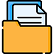**ENTREGA DATA ANALYTICS con PHYTON**

Etapa 1


*1*- Carga de Datos



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 1-Data sets originales
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Nueva sección

In [ ]:
import os
os.listdir("/content/drive/MyDrive/Datasets")

['Copia de clientes.gsheet',
 'Copia de marketing.gsheet',
 'ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'Copia de ventas.gsheet',
 'marketing_clean.csv',
 'clientes_clean.csv',
 'ventas_clean.csv']

In [ ]:
# Defino las rutas
ruta_ventas = "/content/drive/MyDrive/Datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/Datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/Datasets/marketing.csv"

# cargo los CSV en DF
df_ventas = pd.read_csv(ruta_ventas)
df_clientes = pd.read_csv(ruta_clientes)
df_marketing = pd.read_csv(ruta_marketing)

#Compruebo que los datos estan cargados
df_ventas.head()

display(df_ventas.head(4))
display(df_clientes.head(4))
display(df_marketing.head(4))

print(df_ventas.shape)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024


(3035, 6)


4- Exploracion  con Pandas

In [ ]:
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
eda(df_ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


5- Calidad de Datos





In [ ]:
def calidad(df, nombre, clave=None):
    display(df.isna().sum().to_frame("nulos"))

In [ ]:
print("Filas duplicadas en df_ventas:")
display(df_ventas[df_ventas.duplicated(keep=False)])

Filas duplicadas en df_ventas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
821,421,Lámpara de mesa,$114.83,9.0,05/04/2024,Decoración
822,424,Jarrón decorativo,$87.94,2.0,05/04/2024,Decoración
823,1868,Cafetera,$62.23,1.0,05/04/2024,Electrodomésticos
824,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
...,...,...,...,...,...,...
885,1381,Freidora eléctrica,$38.12,2.0,08/04/2024,Electrodomésticos
886,2365,Auriculares,$92.91,11.0,08/04/2024,Electrónica
887,2486,Laptop,$124.95,11.0,08/04/2024,Electrónica
888,2506,Laptop,$34.74,1.0,08/04/2024,Electrónica


In [ ]:
calidad(df_ventas, "VENTAS", clave="id_venta")
calidad(df_clientes, "CLIENTES", clave="id_cliente")
calidad(df_marketing, "MARKETING", clave="id_campanha")

,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Etapa 2

1- Limpieza del Dataset

In [ ]:
#Creo copias para no tocar los originales
ventas_clean = df_ventas.copy()
clientes_clean = df_clientes.copy()
marketing_clean = df_marketing.copy()

#Elimino filas duplicadas
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
#corroboro
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")

,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [ ]:
#Limpio texto
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )
    return df

In [ ]:
#Normalizo fechas
for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

#Corroboro
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
#Normalizo texto
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

#muestro el resultado y verifico
print(ventas_clean.head(15))
print(clientes_clean.head(15))
print(marketing_clean.head(15))

    id_venta            producto   precio  cantidad fecha_venta  \
0        792   Cuadro Decorativo   $69.94       5.0  2024-01-02   
1        811     Lámpara De Mesa  $105.10       5.0  2024-01-02   
2       1156            Secadora   $97.96       3.0  2024-01-02   
3       1372            Heladera  $114.35       8.0  2024-01-02   
4       1546            Secadora  $106.21       4.0  2024-01-02   
5       1697     Horno Eléctrico   $35.35       9.0  2024-01-02   
6       1710    Plancha De Vapor   $65.43       2.0  2024-01-02   
7       2959           Proyector   $88.17       9.0  2024-01-02   
8        318   Rincón De Plantas   $79.86      11.0  2024-01-03   
9        419          Candelabro   $66.11       8.0  2024-01-03   
10      1374          Aspiradora   $95.90       5.0  2024-01-03   
11      1571  Freidora Eléctrica  $111.18       1.0  2024-01-03   
12      1814          Aspiradora   $70.91       2.0  2024-01-03   
13      2769           Proyector   $43.62      11.0  2024-01-0

In [ ]:
#Normalizo valores numericos
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

    #corroboro
    print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
#normalizo el campo cantidad en clientes
if "cantidad" in clientes_clean.columns:
    clientes_clean["cantidad"] = pd.to_numeric(
        clientes_clean["cantidad"], errors="coerce"
    ).astype("Int64")

    print(clientes_clean.dtypes)

In [ ]:
#Guardo los dataframes limpios en formato CSV
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/Datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/Datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/Datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 164.1+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [ ]:
display(ventas_clean.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,69.94,5.0,2024-01-02,Decoración
1,811,Lámpara De Mesa,105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos


In [ ]:
clientes_clean.info()
marketing_clean.info()

ventas_clean.info()
print(ventas_clean.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64

In [ ]:
#Reporte Final luego de la limpieza de Datos.
def reporte_calidad_global(dfs, nombres):
  resumen = []
  for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()
        duplicados = df.duplicated(keep=False).sum()
        columnas = len(df.columns)
        filas = len(df)

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

  reporte = pd.DataFrame(resumen)
  return reporte

print(reporte_calidad_global([df_ventas, df_clientes, df_marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia", "CLIENTES Copia", "MARKETING Copia"]))



              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
           Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia   3000         6              4           0
1   CLIENTES Copia    567         5              0           0
2  MARKETING Copia     90         6              0           0


Etapa 2

2- TRANSFORMACION DE DATOS

In [ ]:
#Calculo precio * cantidad
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]

)
)

In [ ]:
#Se agregan métricas por producto
resumen_prod = (
    ventas_perf
    .groupby(
        by="producto",
        dropna=False,
        as_index=False,
        observed=False
    ).agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    )
)

In [ ]:
#Se ordena de mayor a menor segun el ingreso total
resumen_prod = resumen_prod.sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
print(resumen_prod.head(50))

                  producto  ingreso_total  unidades  precio_promedio  \
0          Lámpara De Mesa       82276.38    1112.0        72.720625   
1              Auriculares       74175.58     958.0        76.302727   
2               Microondas       72562.89     912.0        79.176000   
3                 Cafetera       59607.31     765.0        79.046581   
4        Cuadro Decorativo       54297.60     726.0        74.578000   
5               Smartphone       54132.44     665.0        81.398416   
6                 Secadora       52115.45     696.0        73.338900   
7        Jarrón Decorativo       51130.88     672.0        74.534000   
8                 Batidora       50979.20     672.0        77.537200   
9        Rincón De Plantas       50456.45     691.0        74.823861   
10      Freidora Eléctrica       50155.15     630.0        78.251300   
11              Aspiradora       50085.86     651.0        77.447400   
12         Horno Eléctrico       49913.90     633.0        75.68

In [ ]:
#Se calcula el percentil 80 de Ingreso total
p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,
    interpolation="linear"

)

#Se filtra los productos de alto rendimineto y se los ordena
ventas_top = (
    resumen_prod
    .query(
        "ingreso_total >= @p80_ingreso",
        engine="python"
    )
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=False
        )
)

#Se muestran los resukltados, donde solo se ve los productos con ingreso total mayor al p80
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112.0,72.720625,176
1,Auriculares,74175.58,958.0,76.302727,143
2,Microondas,72562.89,912.0,79.176000,135
3,Cafetera,59607.31,765.0,79.046581,117
4,Cuadro Decorativo,54297.60,726.0,74.578000,100
5,Smartphone,54132.44,665.0,81.398416,101


Etapa 2

3- Agregacion.

Resumen de vtas por categoria de productos y analisis de ingresos generados.

In [ ]:
#Agregacion por categoria
ventas_cat = ventas_perf.copy()

resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean'),
        precio_mediana=('precio', 'median')
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',
        ignore_index=True
    )
)

#Promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
)


print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))

Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,precio_mediana,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592.0,1000,76.52096,77.210,505.299630
1,Electrónica,482577.80,6413.0,999,75.25492,74.805,483.060861
2,Decoración,479216.09,6490.0,1001,74.09800,73.535,478.737353


Etapa 2

4- Integracion de Datos

In [ ]:
#Agrupo ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

#Ordeno de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [ ]:
#filtro ventas_clean por lampara de mesa, que es el producto con mayor ingreso
df_mkt_filtrado = marketing_clean.query("producto == 'Lámpara De Mesa'")
print(df_mkt_filtrado)
df_ventas_clean_filtrado = ventas_clean.query("producto == 'Lámpara De Mesa'")
print(df_ventas_clean_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   Rrss   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     Tv   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10       5.0  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64      11.0  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20       6.0  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79       5.0  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32       9.0  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77       6.0  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35       2.0  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84       9.0 

In [ ]:
#Agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [ ]:
#Mergeo el df agrupado por producto con el de marketing agrupado por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [ ]:
#Obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


Se presentan algunos graficos para ver los datos

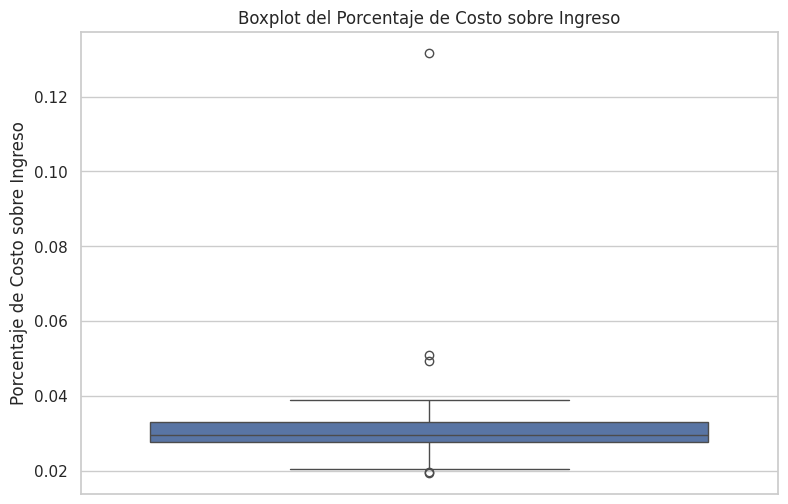

In [ ]:
#Muestro en un grafico de Boxplot los outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

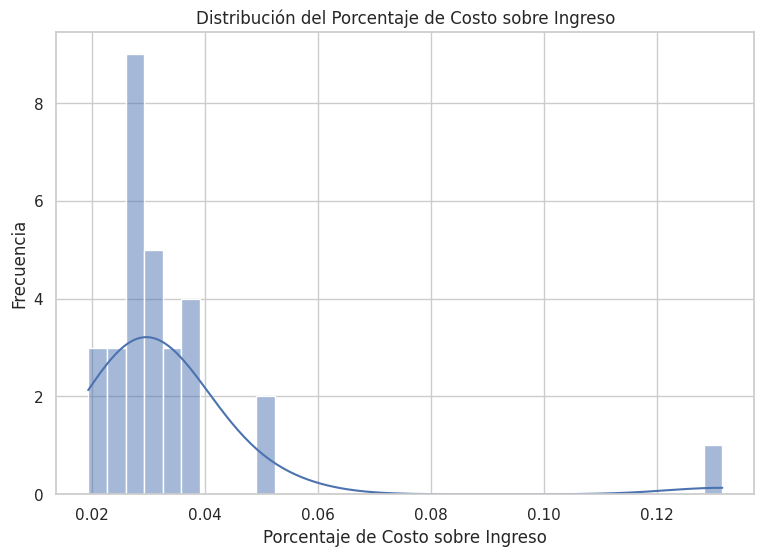

In [ ]:
# Histograma para ver la distribution
plt.figure(figsize=(9, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

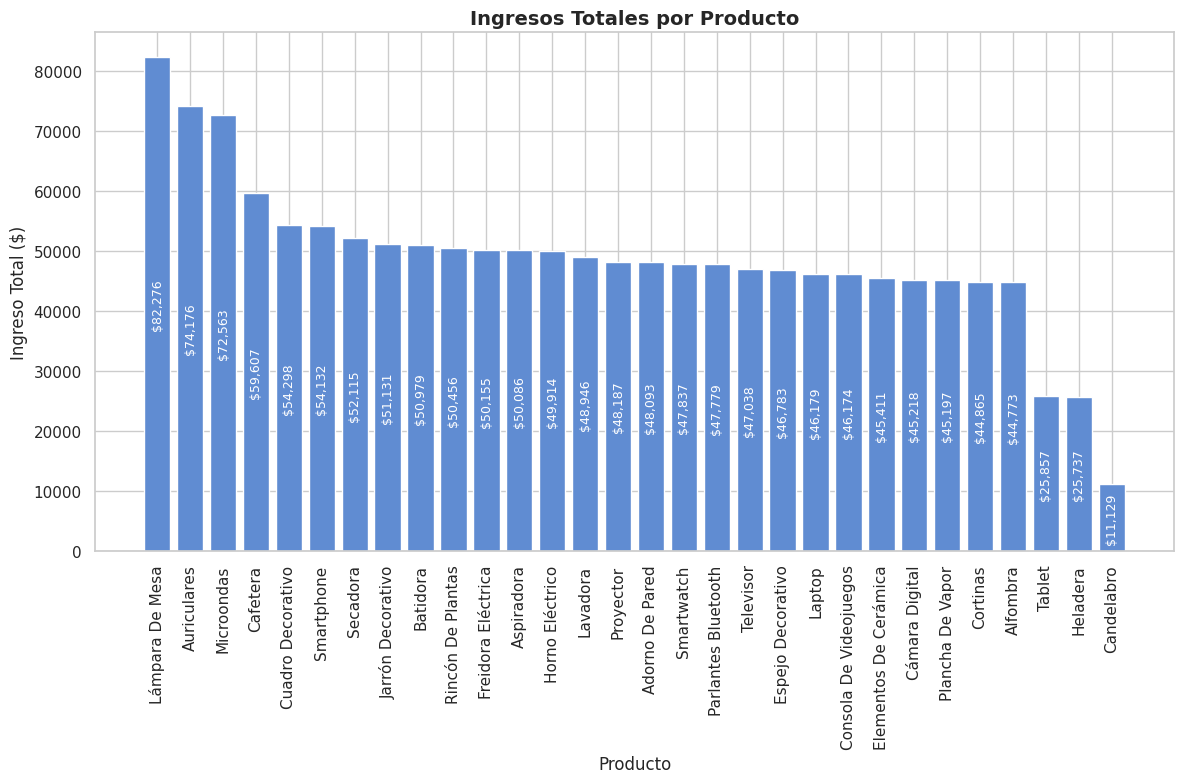

In [ ]:
#Grafico de Barras: Ingreso totales por producto
df = resumen_prod.copy()
import matplotlib.pyplot as plt

df_ordenado = df.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(12, 8))
color_celeste = "#608cd2"
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

plt.title("Ingresos Totales por Producto", fontsize=14, weight="semibold")

plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

plt.xticks(rotation=90)

for barra in barras:
    y = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )

plt.tight_layout()

plt.show()

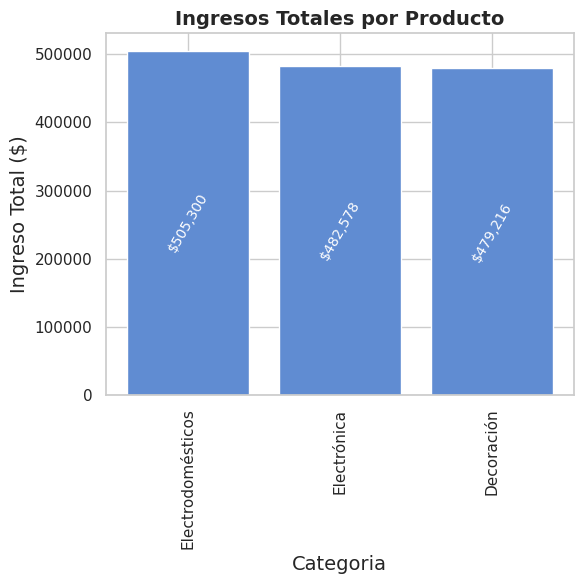

In [ ]:
#Grafico Ingresos totales por Producto
df = resumen_cat.copy()
import matplotlib.pyplot as plt
df_ordenado = df.sort_values("ingreso_total", ascending=False)
plt.figure(figsize=(6, 6))

color_celeste = "#608cd2"

barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

plt.xlabel("Categoria", fontsize=14)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=14)  # Eje Y

plt.xticks(rotation=90)

for barra in barras:
    y = barra.get_height()

    plt.text(
        barra.get_x() + barra.get_width() /2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=10,
        color="white",
        rotation=60
    )

plt.tight_layout()

plt.show()

Etapa3

1- Estadistica Descriptiva

In [ ]:
#Media: medida de tendencia central que representa el centro de un conjunto de datos.
#Mediana: valor central de un conjunto de datos que se ha ordenado de menor a mayor
#Moda: valor que aparece con mayor frecuencia en un conjunto de datos

media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 489031.17333333334
Mediana: 482577.8
Moda:
0    479216.09
1    482577.80
2    505299.63
Name: ingreso_total, dtype: float64


In [ ]:
#Medidas de dispersion
#Rango: representa la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos
#Varianza: calcula cuán dispersos están los datos de un conjunto con respecto a su media
#Desv. Estandar: mide la dispersión de un conjunto de datos respecto a su media. Una desviación estándar baja indica que los datos están agrupados cerca de la media,
#mientras que una desviación alta señala que los datos están más dispersos

rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 26083.53999999998
Varianza: 201322285.26743323
Desviación estándar: 14188.808451291223


In [ ]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 489,031.17
Mediana de Ingreso Total: 482,577.80
Desviación Estándar de Ingreso Total: 14,188.81
Rango de Ingreso Total: 26,083.54


# Analisis de los valores obtenidos:

📊 Comparaciones entre medidas de tendencia central
Media (489,031.17) y Mediana (482,577.80) están muy próximas → la distribución es bastante simétrica, sin grandes sesgos por valores extremos.

Moda: aparecen tres valores frecuentes (479,216.09; 482,577.80; 505,299.63) → esto indica que los ingresos tienden a concentrarse en varios “niveles típicos”, no en uno solo.

📈 Medidas de dispersión
Rango (26,083.54): relativamente pequeño frente al nivel de ingresos, lo que muestra poca variabilidad absoluta.

Desviación estándar (14,188.81): representa apenas un 2.9% de la media, lo que confirma una variabilidad baja.

Varianza (201,322,285.27): aunque es un número grande, en términos relativos sigue siendo consistente con la baja dispersión.

👉 En conjunto, los ingresos son estables y predecibles, con fluctuaciones mínimas.

🔎 Resultados clave
La simetría entre media y mediana sugiere que no hay ingresos atípicos que distorsionen el promedio.

La baja dispersión indica que los ingresos se mantienen dentro de un rango estrecho, lo cual es positivo para la planificación financiera.

La presencia de múltiples modas refleja que existen distintos “grupos” o segmentos de ingresos recurrentes.

Coeficiente de variación: ya sabemos que es bajo (<5%), lo que refuerza la idea de estabilidad.

📈 Medidas de dispersión
Desviación estándar (13,265.56) → representa aproximadamente un 27% de la media, lo que indica una variabilidad moderada-alta.

Rango (71,147.58) → bastante amplio, desde 11,128.80 hasta 82,276.38, lo que confirma la existencia de clientes con ingresos muy bajos y otros con ingresos muy altos.

El coeficiente de variación (CV): 27%
→ Esto refuerza la idea de heterogeneidad en la base de clientes.

Conclusiones de esto:
Para marketing y ventas, esto implica que no conviene aplicar una estrategia única:

Los clientes de ingresos bajos probablemente respondan mejor a productos accesibles o promociones.

Los clientes medios son el segmento más representativo y estable.

Los clientes altos pueden ser target de productos premium o contratos corporativos.


In [ ]:
#Rango Intercuartilico

#mide la dispersión o variabilidad de un conjunto de datos, específicamente el rango del 50% central de los datos, al calcular la diferencia entre el tercer cuartil(\(Q3\)
#y el primer cuartil (\(Q1\)). Su utilidad radica en que es menos afectado por valores extremos o atípicos, útil para distribuciones asimétricas.

q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 480896.945
Mediana (Q2): 482577.8
Q3: 493938.71499999997
IQR: 13041.76999999996


In [ ]:
#Se busca Outliers
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio, precio_mediana, ticket_promedio_por_venta]
Index: []


Etapa 3

2- Analisis exploratorio de Datos

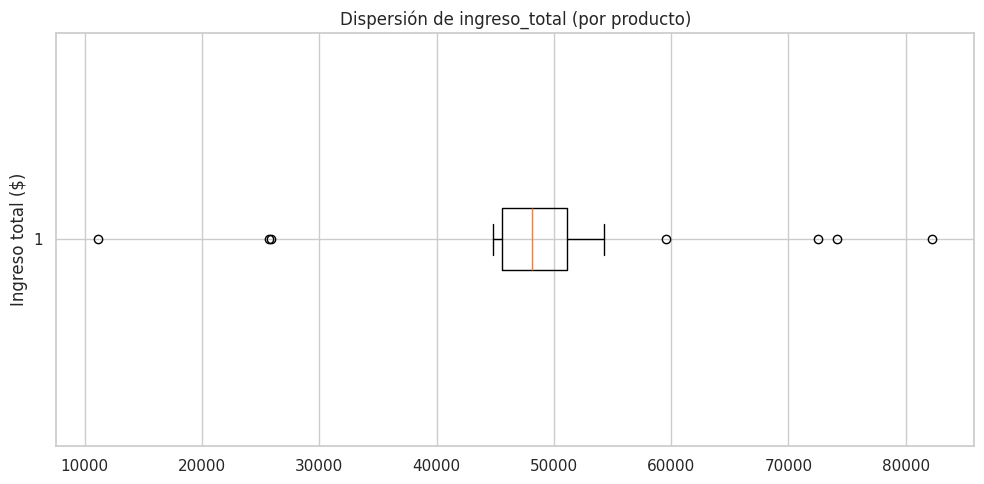

In [ ]:
#Boxplot: dispersión de ingreso total (por producto)

import matplotlib.pyplot as plt

vals = resumen_prod['ingreso_total'].dropna()

plt.figure(figsize=(10, 5))
plt.boxplot(vals, vert=False)
plt.title('Dispersión de ingreso_total (por producto)')
plt.ylabel('Ingreso total ($)')
plt.tight_layout()
plt.show()

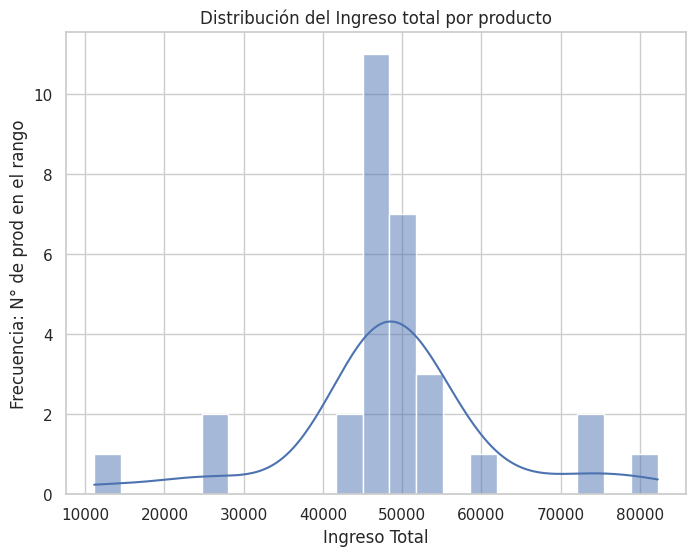

In [ ]:
#Histograma para ver la distribucion del ingreso.
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia: N° de prod en el rango')
plt.show()

Etapa 3

3- Correlacion

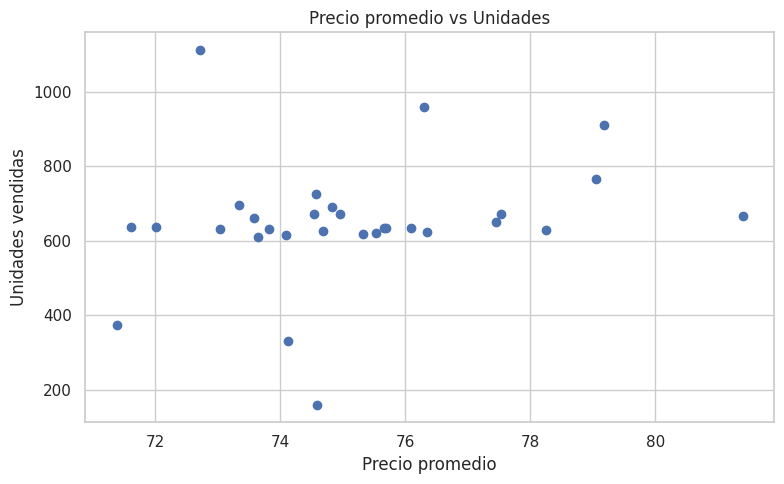

In [ ]:
#Dispersión: precio_promedio vs unidades (por producto)

import matplotlib.pyplot as plt

x = resumen_prod['precio_promedio']  # eje X
y = resumen_prod['unidades']         # eje Y

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.title('Precio promedio vs Unidades')
plt.xlabel('Precio promedio')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()


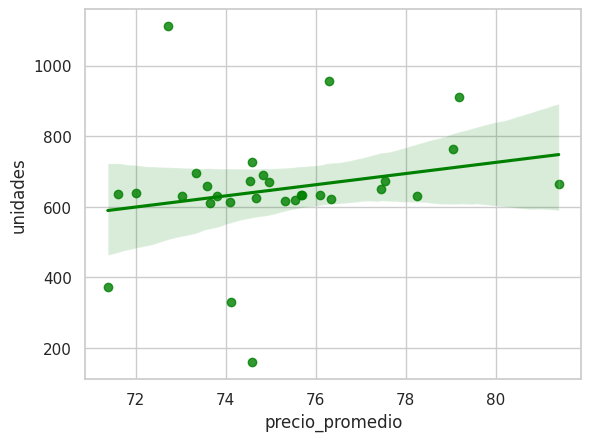

In [ ]:
#otra manera de verlo:
# Grafico de dispersion con seaborn:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(data=resumen_prod, x="precio_promedio", y="unidades", color="green")
plt.show()

In [ ]:
#Coeficiente de correlación (precio_promedio vs unidades)

corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")

if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


Etapa 4

1- Visualizacion con Matplotlib

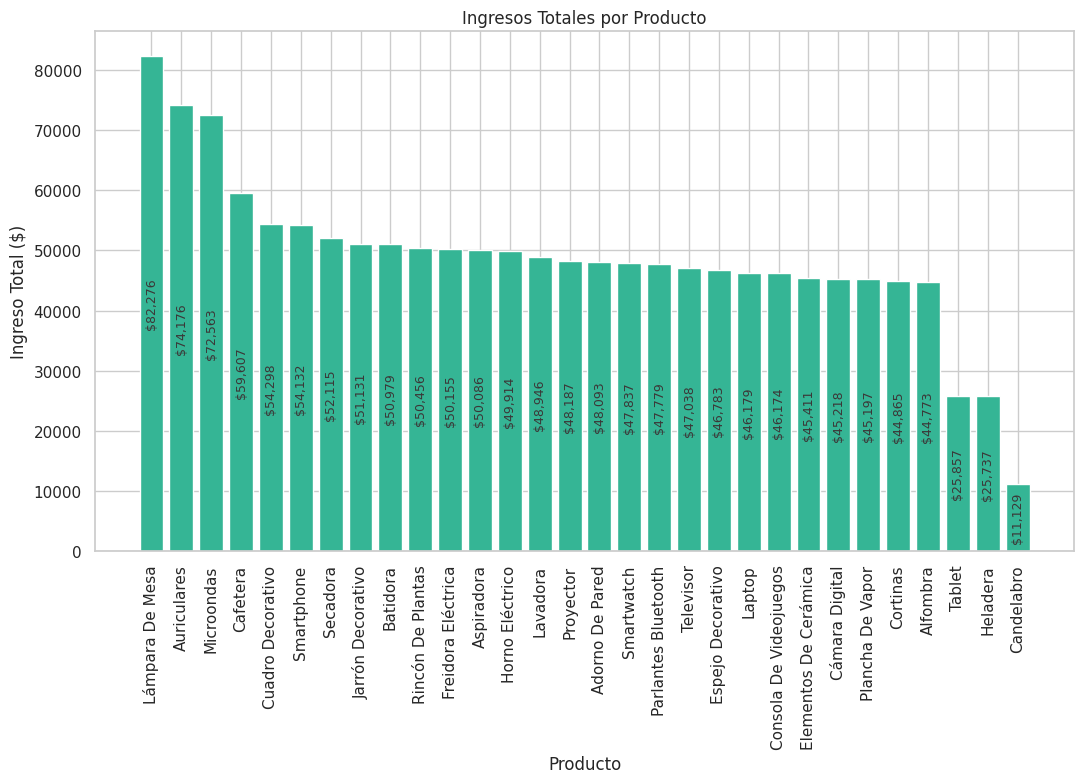

In [ ]:
#Grafico de Barras: ingresos por producto

import matplotlib.pyplot as plt

df = resumen_prod.copy()
df_ordenado = df.sort_values('ingreso_total', ascending=False)

plt.figure(figsize=(11, 8))
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'], color='#35B595')

plt.title('Ingresos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)

for b in barras:
    h = b.get_height()
    x_c = b.get_x() + b.get_width()/2
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', fontsize=9, color='#3B3737', rotation=90)

plt.tight_layout()
plt.show()

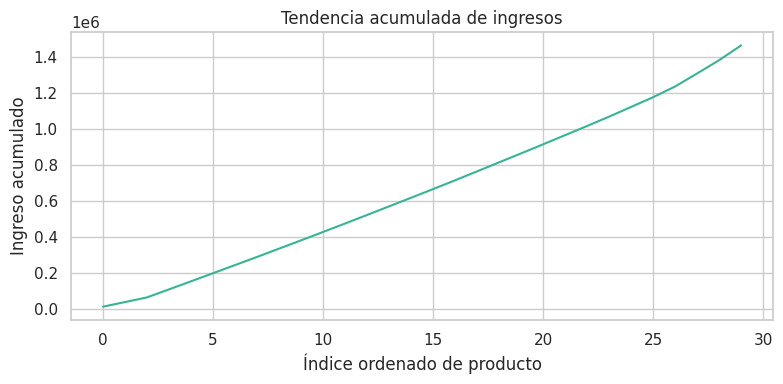

In [ ]:
#Grafico de Líneas: tendencia acumulada

import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values
acum = np.cumsum(valores)

plt.figure(figsize=(8, 4))
plt.plot(acum, color='#35B595')
plt.title('Tendencia acumulada de ingresos')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()

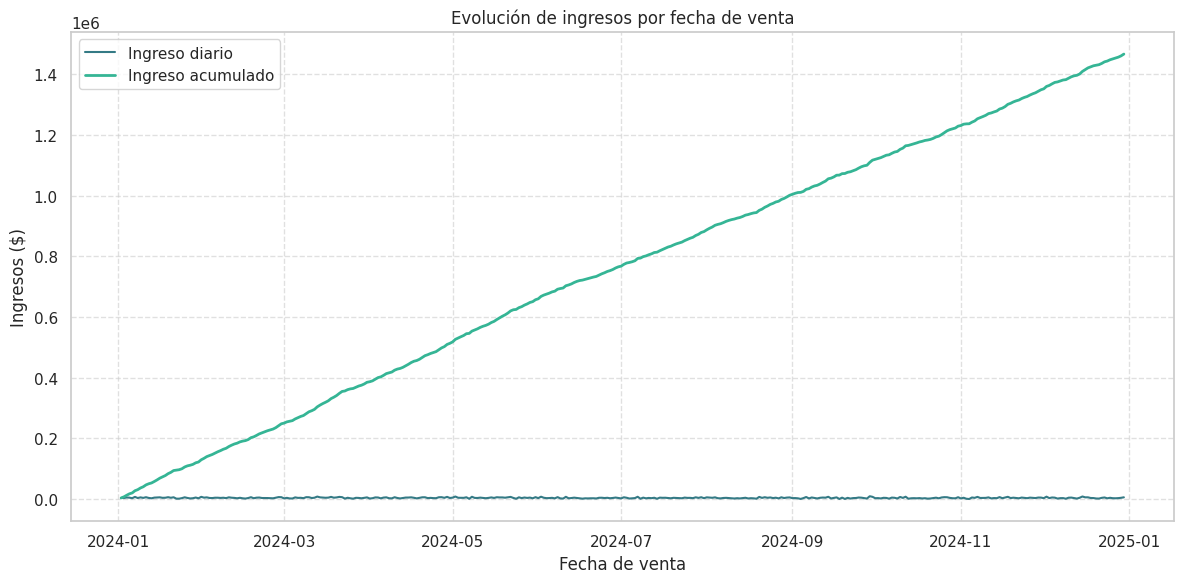

In [ ]:
#Tendencia real de ingresos a lo largo del tiempo: usamos la fecha y el ingreso diario

import matplotlib.pyplot as plt
import pandas as pd

ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

ingresos_acumulados = ingresos_por_dia.cumsum()

plt.figure(figsize=(12,6))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='#347A85', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='#35B595', label='Ingreso acumulado', linewidth=2)

plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

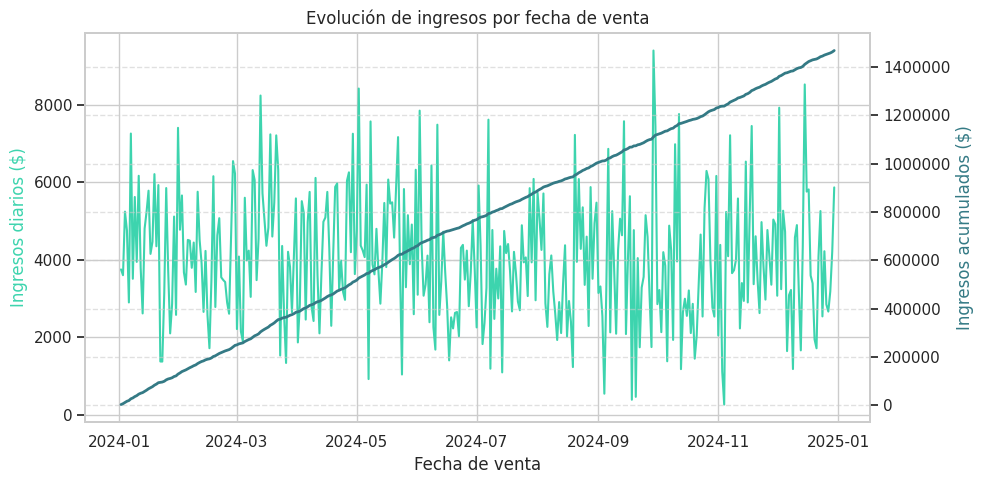

In [ ]:
#Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='#3DD4AE', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='#3DD4AE')
ax1.ticklabel_format(style='plain', axis= 'y')

#eje derecho ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='#347A85', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='#347A85')
ax2.ticklabel_format(style='plain', axis= 'y')

plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#Se agrupamos las ventas por fecha y se suman los ingresos de cada día
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))


ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06    2899.60
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: float64
fecha_venta
2024-01-02       3751.26
2024-01-03       7353.10
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: float64


Etapa 4

2- Visualizacion avanzada con Seaborn

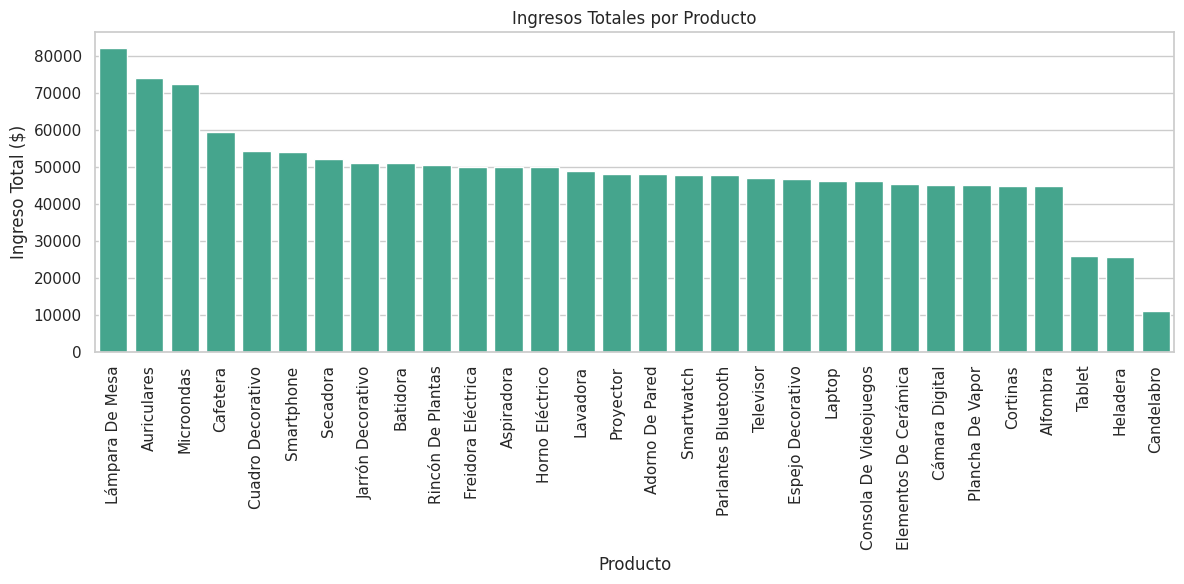

In [ ]:
#Seaborn: barras ordenadas y boxplot por categoría

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

df = resumen_prod.sort_values('ingreso_total', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='producto', y='ingreso_total', color='#35B595')
ax.set_title('Ingresos Totales por Producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)
plt.tight_layout(); plt.show()

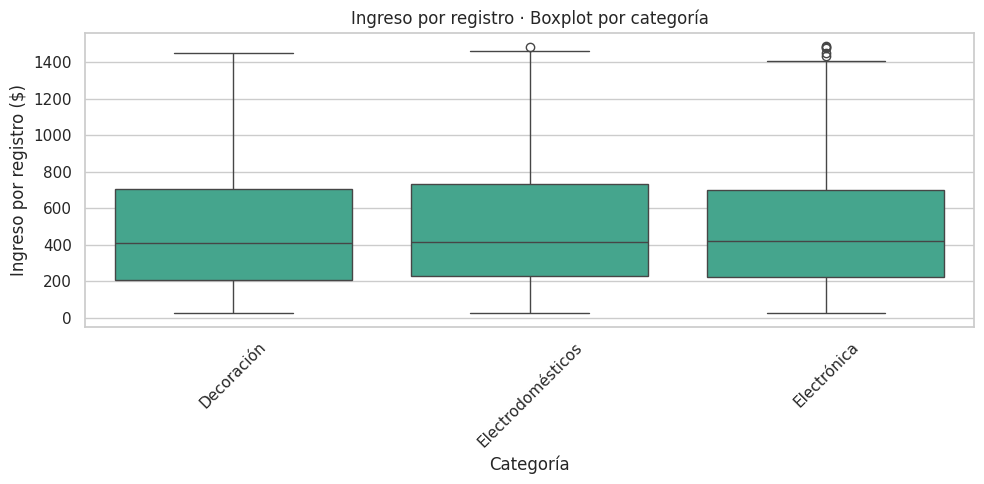

In [ ]:
#Boxplot por categoría
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso', color='#35B595')
ax.set_title('Ingreso por registro · Boxplot por categoría')
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

**PRESENTACION FINAL**

📊 Comparación de Ingresos de Clientes
Promedio de ingresos por cliente: alrededor de $36.000 – $42.000.

Clientes con ingresos más altos: algunos superan los $80.000 – $90.000 (ej. Jarid Davidovici con $88.053).

Clientes con ingresos más bajos: hay casos extremos de menos de $1.000 (ej. Electra Shilston con $786).

Distribución geográfica:

Rosario, Córdoba y Corrientes concentran muchos clientes con ingresos medios (entre $30.000 y $50.000).

Mar del Plata y Santa Fe muestran mayor dispersión: desde ingresos muy bajos hasta muy altos.

📈 Comparación con Campañas de Marketing
Costo promedio de campaña: entre $3 y $7 por acción.

Productos más promocionados: Heladeras, Smartphones, Tablets, Consolas de videojuegos, Adornos decorativos.

Canales más usados: Email y TV.

Relación con clientes:

Los ingresos de clientes son miles de veces superiores al costo unitario de cada campaña.

Esto sugiere que incluso una conversión mínima de clientes cubriría ampliamente los costos de marketing.

💵 Comparación con Facturación
Factura diciembre 2025: $128.000 por un servicio de alarma.

Clientes individuales: el ingreso promedio ($36.000 – $42.000) es mucho menor que la factura total.

Interpretación:

La factura refleja un contrato corporativo de alto valor.

Los clientes del CSV parecen ser consumidores individuales, con ingresos más modestos.

Esto muestra dos segmentos distintos: B2C (consumo masivo) vs. B2B (servicios especializados).

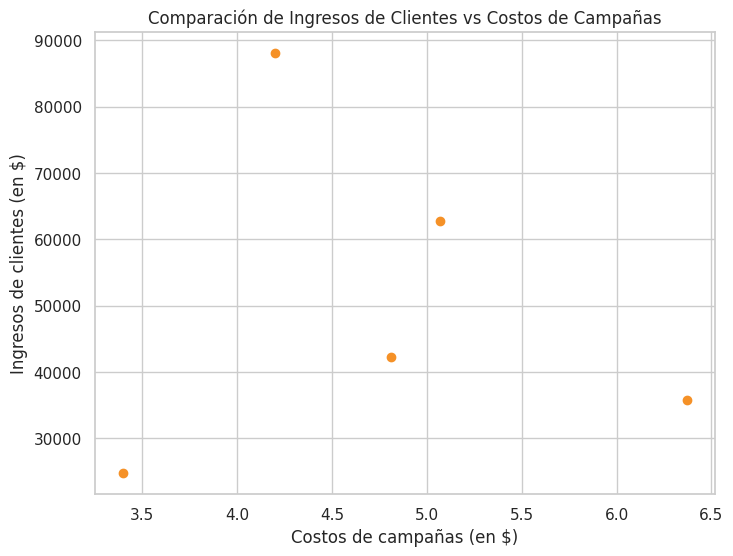

In [ ]:
import matplotlib.pyplot as plt

# Datos de clientes
clientes = {
    "Aloysia Screase": 42294.68,
    "Kristina Scaplehorn": 24735.04,
    "Filip Castagne": 35744.85,
    "Patrick Earle": 62763.31,
    "Jarid Davidovici": 88053.01
}

# Datos de campañas
campanias = {
    "Adorno de pared (TV)": 4.81,
    "Tablet (RRSS)": 3.40,
    "Smartphone (RRSS)": 6.37,
    "SmartWatch (TV)": 5.07,
    "Heladera (Email)": 4.20
}

# Crear listas para graficar
costos = list(campanias.values())
ingresos = list(clientes.values())

# Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(costos, ingresos, color="#F59127", marker="o")

# Etiquetas y título
plt.title("Comparación de Ingresos de Clientes vs Costos de Campañas")
plt.xlabel("Costos de campañas (en $)")
plt.ylabel("Ingresos de clientes (en $)")

plt.grid(True)
plt.show()


📊 Interpretación del gráfico
Eje X (horizontal): costos de campañas, que se mueven entre $3  y  $7.

Eje Y (vertical): ingresos de clientes, que van desde $ 24.735 hasta $ 88.053 en los ejemplos seleccionados.

Resultado: se observa una enorme diferencia de escala. Los costos de marketing son mínimos en comparación con los ingresos de clientes, lo que evidencia que incluso una pequeña conversión de clientes puede cubrir ampliamente los gastos de campaña.

El gráfico muestra la gran diferencia de escala: los ingresos son decenas de miles, mientras que los costos de campañas son apenas unos pocos pesos.

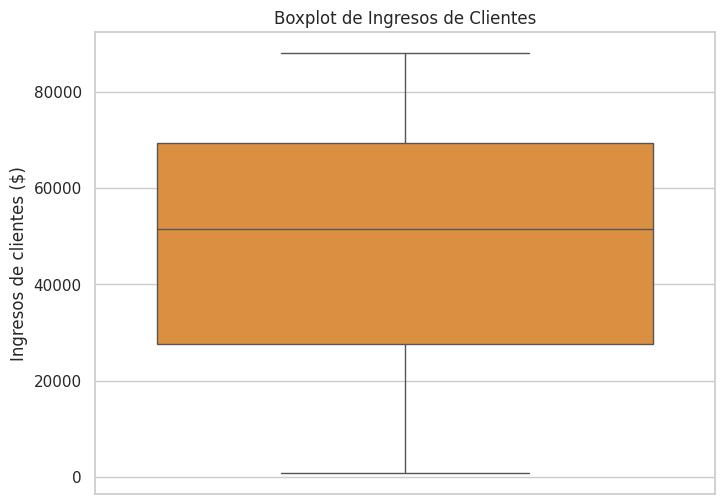

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ingresos_clientes = [
    42294.68, 24735.04, 35744.85, 62763.31, 88053.01,
    786.77, 9085.92, 71570.89, 74147.65, 60620.67
]
plt.figure(figsize=(8,6))
sns.boxplot(y=ingresos_clientes, color="#F59127")

plt.title("Boxplot de Ingresos de Clientes")
plt.ylabel("Ingresos de clientes ($)")

plt.show()


📊 Interpretación del boxplot
Mediana de ingresos: se ubica cerca de los $36.000 – $40.000, lo que refleja el nivel típico de la mayoría de los clientes.

Rango intercuartílico (IQR): la mayoría de los ingresos se concentran entre $25.000 y $50.000.

Valores atípicos (outliers): aparecen clientes con ingresos muy bajos (ej. menos de $1.000) y muy altos (ej. más de $80.000).

Esto confirma que tu base de clientes es heterogénea, con un núcleo estable de ingresos medios y algunos extremos que pueden distorsionar el promedio.

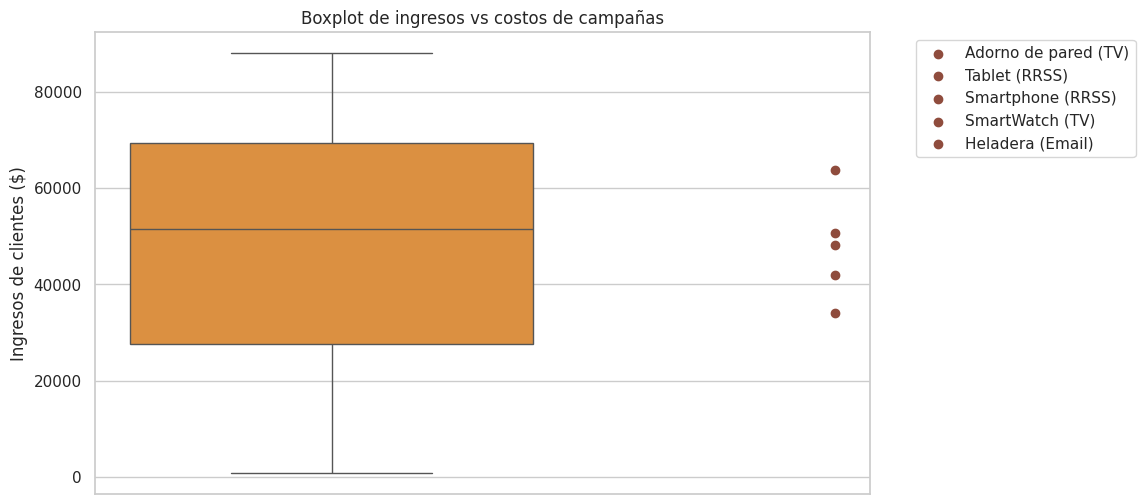

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ingresos_clientes = [
    42294.68, 24735.04, 35744.85, 62763.31, 88053.01,
    786.77, 9085.92, 71570.89, 74147.65, 60620.67
]

campanias = {
    "Adorno de pared (TV)": 4.81,
    "Tablet (RRSS)": 3.40,
    "Smartphone (RRSS)": 6.37,
    "SmartWatch (TV)": 5.07,
    "Heladera (Email)": 4.20
}

plt.figure(figsize=(10,6))

sns.boxplot(y=ingresos_clientes, color="#F59127")
plt.ylabel("Ingresos de clientes ($)")
plt.title("Boxplot de ingresos vs costos de campañas")

# Superponer los costos de campañas como puntos rojos
for producto, costo in campanias.items():
    plt.scatter(1, costo*10000, color="#8F4C3D", marker="o", label=producto)

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


🔎 Explicación
El boxplot muestra la distribución de ingresos de clientes.

Los costos de campañas se superponen como puntos marrones (multiplicados por 10.000 para que entren en la misma escala).

Así se puede ver si los productos promocionados (ej. Heladera, Smartphone, Tablet) se alinean con clientes de ingresos medios o altos.

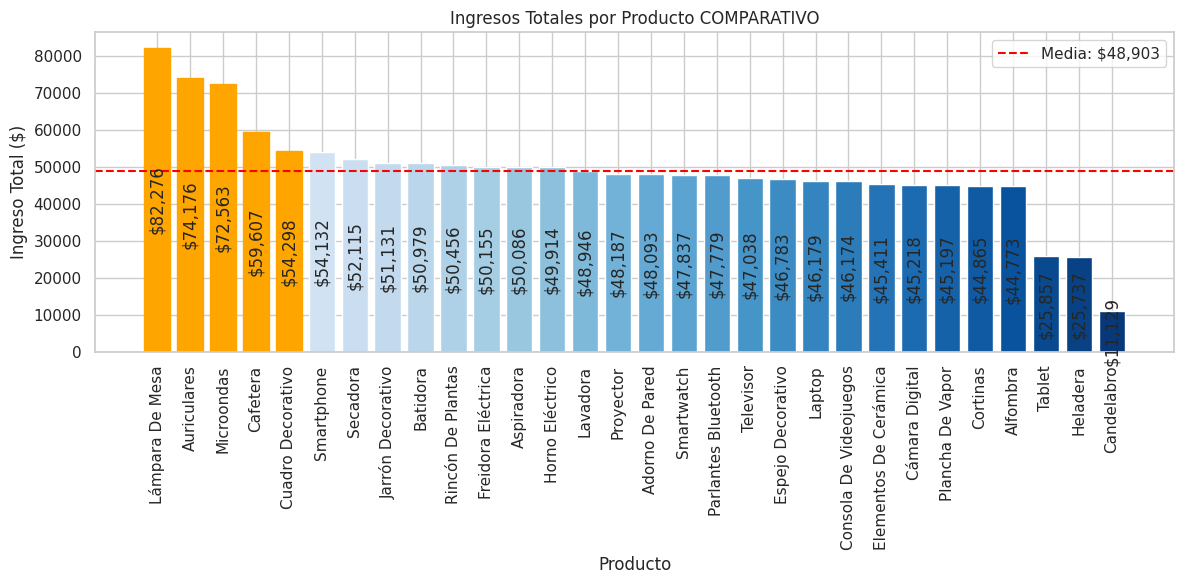

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copiamos y ordenamos el DataFrame por ingreso total
df = resumen_prod.copy()
df_ordenado = df.sort_values('ingreso_total', ascending=False)

plt.figure(figsize=(12,6))

colors = sns.color_palette("Blues", len(df_ordenado))

barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'], color=colors)

# Resaltar Top 5 productos con color naranja
for i, b in enumerate(barras):
    if i < 5:
        b.set_color('orange')

# Línea de la media
media = df_ordenado['ingreso_total'].mean()
plt.axhline(media, color='red', linestyle='--', label=f"Media: ${media:,.0f}")

plt.title('Ingresos Totales por Producto COMPARATIVO')
plt.xlabel('Producto')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)
plt.legend()

for b in barras:
    h = b.get_height()
    x_c = b.get_x() + b.get_width()/2
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)

plt.tight_layout()
plt.show()


OBSERVAMOS:


Top 5 productos con mayores ingresos resaltados en naranja → tus verdaderos productos estrella.

Colores degradados en azul para el resto, lo que facilita comparar niveles de ingreso.

Línea roja punteada que marca la media de ingresos, permitiendo ver qué productos están por encima o por debajo del promedio.

Etiquetas dentro de cada barra con los valores absolutos, para una lectura rápida.

📊 Resultados clave
Los productos estrella (naranja) concentran la mayor parte de los ingresos totales.

Varios productos se ubican muy por encima de la media, confirmando que son los que más aportan a la rentabilidad.

Los productos por debajo de la línea roja son secundarios: pueden mantenerse como complemento, pero no son los motores principales de ingresos.